In [44]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.action_chains import ActionChains
import time
import csv 
import re
from bs4 import BeautifulSoup
import unicodedata
from selenium.webdriver.common.by import By
import pandas as pd


In [154]:
keyword = ['Myeongdong','명동','明洞','明洞餐厅', 'ミョンドン','みょんどん','韓國美食','明洞美食']

email = 'redSan0tableChez214' 
password = 'redtable0214'

In [46]:
# selenium 이용해서 드라이버 지정하고 url 불러오기
# keyword 를 포함한 url로 쓰기
driver = webdriver.Chrome(r"C:\Users\USER\Downloads\chromedriver.exe")

# 인스타그램 접속하기
insta_url = 'https://www.instargram.com' 
driver.get(insta_url)
#time.sleep(2)
time.sleep(3)

C:\Users\USER\AppData\Local\Temp/ipykernel_18672/314291897.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(r"C:\Users\USER\Downloads\chromedriver.exe")


In [47]:
# 예제 5-3 인스타계정으로 로그인하기
#email = '인스타계정입력해주세요'   ### 계정 정보 수정 필요
input_id = driver.find_elements_by_css_selector('input._2hvTZ.pexuQ.zyHYP')[0]
#input_id.clear()
input_id.clear()
input_id.send_keys(email)

#password = '인스타비번입력해주세요' ### 비번 정보 수정 필요
time.sleep(1)
input_pw = driver.find_elements_by_css_selector('input._2hvTZ.pexuQ.zyHYP')[1]
input_pw.clear()
input_pw.send_keys(password)
input_pw.submit()
time.sleep(3)
# 로그인 버튼 클릭 click
login = driver.find_element_by_css_selector("button.sqdOP.L3NKy.y3zKF")
login.click()


C:\Users\USER\AppData\Local\Temp/ipykernel_18672/2901931748.py:3: DeprecationWarning: find_elements_by_css_selector is deprecated. Please use find_elements(by=By.CSS_SELECTOR, value=css_selector) instead
  input_id = driver.find_elements_by_css_selector('input._2hvTZ.pexuQ.zyHYP')[0]
C:\Users\USER\AppData\Local\Temp/ipykernel_18672/2901931748.py:10: DeprecationWarning: find_elements_by_css_selector is deprecated. Please use find_elements(by=By.CSS_SELECTOR, value=css_selector) instead
  input_pw = driver.find_elements_by_css_selector('input._2hvTZ.pexuQ.zyHYP')[1]
C:\Users\USER\AppData\Local\Temp/ipykernel_18672/2901931748.py:16: DeprecationWarning: find_element_by_css_selector is deprecated. Please use find_element(by=By.CSS_SELECTOR, value=css_selector) instead
  login = driver.find_element_by_css_selector("button.sqdOP.L3NKy.y3zKF")


In [35]:
#time.sleep(2)
## 로그인 시 팝업 창 제거
# 로그인 저장 팝업 제거
#later_button = driver.find_elements_by_class_name("sqdOP")
#later_button[0].click()
#time.sleep(1)
# 알림창 제거
alert = driver.find_elements_by_css_selector("button.aOOlW")
alertLater = alert[1]
alertLater.click()

C:\Users\USER\AppData\Local\Temp/ipykernel_18672/644256492.py:8: DeprecationWarning: find_elements_by_css_selector is deprecated. Please use find_elements(by=By.CSS_SELECTOR, value=css_selector) instead
  alert = driver.find_elements_by_css_selector("button.aOOlW")


In [155]:
def insta_searching(word) :
    url = insta_url + "/explore/tags/" + word
    return url

url = insta_searching(keyword[-1]) # Myeong Dong
driver.get(url)
time.sleep(1)

In [156]:
# 예제 5-6 HTML에서 첫번째 게시글 찾아 클릭하기
def select_first(driver):
    first = driver.find_element_by_css_selector("div._9AhH0")
    first.click()
    time.sleep(3)
    
select_first(driver)

C:\Users\USER\AppData\Local\Temp/ipykernel_18672/556389458.py:3: DeprecationWarning: find_element_by_css_selector is deprecated. Please use find_element(by=By.CSS_SELECTOR, value=css_selector) instead
  first = driver.find_element_by_css_selector("div._9AhH0")


In [157]:
# 예제 5-7 게시글 정보 가져오기
def get_content(driver):
    # ① 현재 페이지 html 정보 가져오기
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')
    # ② 본문 내용 가져오기
    try:
        # 본문에 사용자 id가 포함
        user_id_len = len(soup.select('a.sqdOP.yWX7d._8A5w5.ZIAjV')[0].text)
        
        # 본문에서 사용자 id 제거
        content = soup.select('div.C4VMK')[0].text[user_id_len:]
        content = unicodedata.normalize('NFC', content) 
        #print(" ".join(re.sub(r'#[^\s#,\\]+' ,"",content).split()))
    except:
        content = ' '
    # ③ 본문 내용에서 해시태그 가져오기(정규식 활용)
    tags = re.findall(r'#[^\s#,\\]+', content.replace('수정됨',''))
    # ④ 작성일자 정보 가져오기
    #date = soup.select('time._1o9PC.Nzb55')[0]['datetime'][:10]
    date = soup.select('time._1o9PC')[0]['datetime'][:10]
    # ⑤ 좋아요 수 가져오기
    try:
        #like = soup.select('div.Nm9Fw > button')[0].text[4:-1]   
        like = int(soup.select('div._7UhW9.xLCgt.qyrsm.KV-D4.fDxYl.T0kll')[0].text[4:-1].replace(',',''))
    except:
        like = 0
    # ⑥ 위치정보 가져오기
    try: 
        place = soup.select('div.M30cS')[0].text
        place = unicodedata.normalize('NFC', place)
    except:
        place = ''
    # ⑦ 수집한 정보 저장하기
    #data = [" ".join(re.sub(r'#[^\s#,\\]+' ,"",content).split()), date, like, place, tags]
    data = [date, like, place, tags]
    return data

get_content(driver)

['2020-02-20',
 213,
 'Myth Jokbal',
 ['#韓國景點',
  '#首爾美食',
  '#韓國',
  '#韓國旅遊',
  '#韓國美食',
  '#韓國必吃',
  '#韓式料理',
  '#首爾必吃',
  '#明洞',
  '#弘大美食',
  '#弘大',
  '#明洞美食',
  '#豬腳116주']]

In [159]:
# 예제 5-8 다음 게시글 열기
def move_next(driver):
    #/html/body/div[6]/div[2]/div/div/button/div/span/svg
    #right = driver.find_element_by_css_selector ('a.coreSpriteRightPaginationArrow')
    #right = driver.find_element_by_css_selector ('button.wpO6b')
    right = driver.find_element(by = By.XPATH, value = '/html/body/div[6]/div[2]/div/div[2]/button')#'//*[@id="react-root"]/section/main/div/div[1]/article/div/div[1]/div/div[1]/div[2]/div/button[2]/div')#'/html/body/div[6]/div[2]/div/div[2]')
    
    #right = driver.find_element(by = By.XPATH, value = '/html/body/div[6]/div[2]/div/div/button/div/span')
    right.click()
    time.sleep(3)

move_next(driver)

In [162]:
results = []
target = 1000      # 크롤링할 게시글 수
for i in range(target):
    # 게시글 수집에 오류 발생시(네트워크 문제 등의 이유로)  2초 대기 후, 다음 게시글로 넘어가도록 try, except 구문 활용
    try:
        data = get_content(driver)    # 게시글 정보 가져오기
        results.append(data)
        move_next(driver)
    except:
        time.sleep(2)
        move_next(driver)
    time.sleep(0.1)
    if i%10 == 0 :
        time.sleep(2)

In [164]:
df = pd.DataFrame(results)
df.columns= ['게시물_날짜','좋아요_수','위치','해시태그']
df = df.sort_values(['게시물_날짜','좋아요_수'],ascending=[True,False])#

In [172]:
md_insta_df = pd.DataFrame([])
folder = './인스타/'
f_list = ['인스타_크롤링_해시태그_Myeongdong.xlsx', '인스타_크롤링_해시태그_明洞.xlsx','인스타_크롤링_해시태그_韓國.xlsx','인스타_크롤링_해시태그_韓國美食.xlsx','인스타_한국_해시태그_明洞美食.xlsx']
for fname in f_list:
    fpath = folder + fname
    temp = pd.read_excel(fpath)
    md_insta_df = md_insta_df.append(temp)

md_insta_df.columns =['content','data','like','place','tags']

In [174]:
# 해시태그가 존재하지 않고 빈 리스트만 있는 경우 제거
md = md[md['tags'].apply(lambda x : len(x)) > 2].drop_duplicates()

In [175]:
tags_total = []
for tags in md['tags']:
    tags_list = tags[2:-2].split("', '")
    for tag in tags_list:
        print(tag)
        tags_total.append(tag.replace("#",''))

#Korea
#seoul
#myeongdong
#教会
#明洞
#Repost
#서울
#명동
#신세계본점
#크리스마스
#미리크리스마스
#메리크리스마스
#연말
#야경
#조명
#여행
#여행스타그램
#여행에미치다
#유디니
#여행사진
#southkorea
#seoul
#myeongdong
#shinsegaemyeongdong
#christmas
#merrychristmas
#theendoftheyear
#nightview
#illumination
#travel
#travelgram
#travelphotography
#traveler21주
#Molto
#몰또
#몰또이탈리안에스프레소바
#명동
#명동카페
#Myeongdong
#MyeongdongCafe18주
#seoulkorea
#Seoul
#Myeongdong
#namsantower
#namsanseoultower
#VisitSeoul
#iseoulu
#seoulsecret
#seoultravel
#urbexphotography
#streetphoto
#seoulphotography
#seoulcity
#wintertime
#winterlight
#winterinkorea
#citybestpics
#cityshots
#koreablogger
#igkorea
#koreatravel
#서울셧
#서울사진찍기좋은곳
#서울사진
#명동
#거리사진
#사진에미치다
#피오티디17주
#서울
#Seoul
#Myeongdong
#명동
#SeoulTower
#남산타워
#streetphotography
#travelphotography
#korea
#asia
#여행사진
#일상
#출사
#bestoftheday
#everydayeverywhere
#everydaykorea
#ig_asia_
#ig_korea
#koreaphotographer
#editorialphotographer
#travelstoke
#igmaster
#aov
#fujiframez
#fujifilm
#fujifeed
#gfx50r
#gf3570mm13주
#AD
#메리어트본보이
#알

#SpringDay
#SpringDays
#SpringinKorea
#CherryBlossom
#CherryBlossoms
#Seoul
#Korea
#Korean
#Myeongdong
#Gangnam
#JejuIsland
#NamiIsland
#NamsanTower
#NSeoulTower
#SeoulTower
#HanRiver
#SeoulForestPark
#KPop
#KPopSong
#KPopMusic
#KDrama
#KoreanDrama
#Love
#LoveYou
#ILoveYou
#명동
#명동카페
#명동공간
#myeongdong
#myeongdongstreet
#myeongdongcafe
#4478m1주
#seoul
#visitseoul
#tourseoul
#tourkorea
#tourkoreamurah
#visitkorea
#travelkorea
#koreatravel
#travelkoreamurah
#namsantower
#banpobridge
#cheongyecheon
#myeongdong
#myeongdongstreet
#jalanjalankorea
#seoultower
#tourmurahkorea
#liburanmurah
#tripkorea
#koreatrip
#tripseoul
#tourmurah
#tripkoreamurah1주
#sghair
#sghairsalon
#sghairstylist
#koreanhairstyle
#koreanhairstudio
#myeongdong
#myeongdonghairsalon
#myeondonghairstudio1주
#57hostel
#korea
#koreatravel
#myeongdong
#myungdong
#명동
#명동숙소
#명동호텔
#명동게스트하우스
#명동호스텔
#57명동호스텔
#명동성당
#molto
#korea
#myeongdong
#aroundtheworldpix
#globe_visuals
#oldbuildings
#陈立农
#珠海
#lashesonfleek
#唐人街
#重庆市
#拉萨
#lashtrain

#southkorea
#korea
#seoul
#myeongdong
#bongeunsa
#bongeunsatemple
#iseoulu
#seoulweekend
#seoulsearching
#adventures
#notallwhowander
#girlswhotravel
#heradventures
#fatgirlstraveling
#travelgram
#lanterns
#buddhasbirthday
#temples
#backonourbullshit
#rightbackatitagain
#travel
#travelingteacher
#travelkorea
#wandering
#분위기미쳤따
#분위기에취해
#넘많이마셔따
#실외기안보여
#서울애니메이션센터
#애니소풍
#어린이날
#아이랑명동
#명동가볼만한곳..
#YES
#51개월땉
#5살어린이
#아이랑
#아이랑가볼만한곳
#서울아이랑
#성장일기
#일상공유
#육아일기
#성장기록
#travelphotography
#withfamily
#familytime
#southkorea
#seoul
#myeongdong
#dailylife
#withlove
#yologuesthouse
#myeongdong4일
#espresso
#molto
#seoul
#myeongdong
#church
#seoultower
#명동
#에스프레소바
#몰또
#솔직히말해서커피는...
#위치는기가막힘
#☕️
#서울
#명동성당
#에스프레소
#cafe
#coffee4일
#어버이날부모님들께어머니아버지
#카네이션
#프리지아
#어버이날
#개성만점
#탈회피성
#소마드로잉카페명동점
#롯데백화점명동
#신세계백화점명동
#몰또는
#명동교자
#애플스토어
#타임워크
#seoul
#korea
#spring
#sakura
#shoppingstreet
#travel
#myeongdong
#travelphotography
#lotte
#youngplaza4일
#kakaofriends
#SouthKorea
#korea
#sale
#talktalkkorea2021
#seoultower
#seoul

#古着
#古着屋
#激安
#お買い得
#お得
#セール
#明洞
#鶴橋
#ファッションコーデ
#パロディ服
#中古品
#エルメスコピー
#ブランドコピー
#ブランドコピー通販
#パロ
#ディ専門
#ショッピング
#パロディー靴
#パロディ服
#中古ブランド
#シャネルケース
#シャネルパロディ
#ヴィトンパロディ
#ヴィトンケース
#渡韓
#靴14시간
#パロディ
#靴
#エルメス
#帽子
#服
#パロディバッグ
#古着
#古着屋
#激安
#お買い得
#お得
#セール
#明洞
#鶴橋
#ファッションコーデ
#パロディ服
#中古品
#エルメスコピー
#ブランドコピー
#ブランドコピー通販
#パロ
#ディ専門
#ショッピング
#パロディー靴
#パロディ服
#中古ブランド
#シャネルケース
#シャネルパロディ
#ヴィトンパロディ
#ヴィトンケース
#渡韓
#靴14시간
#パロディ
#靴
#エルメス
#帽子
#服
#パロディバッグ
#古着
#古着屋
#激安
#お買い得
#お得
#セール
#明洞
#鶴橋
#ファッションコーデ
#パロディ服
#中古品
#エルメスコピー
#ブランドコピー
#ブランドコピー通販
#パロ
#ディ専門
#ショッピング
#パロディー靴
#パロディ服
#中古ブランド
#シャネルケース
#シャネルパロディ
#ヴィトンパロディ
#ヴィトンケース
#渡韓
#靴14시간
#パロディ
#靴
#エルメス
#帽子
#服
#パロディバッグ
#古着
#古着屋
#激安
#お買い得
#お得
#セール
#明洞
#鶴橋
#ファッションコーデ
#パロディ服
#中古品
#エルメスコピー
#ブランドコピー
#ブランドコピー通販
#パロ
#ディ専門
#ショッピング
#パロディー靴
#パロディ服
#中古ブランド
#シャネルケース
#シャネルパロディ
#ヴィトンパロディ
#ヴィトンケース
#渡韓
#靴14시간
#メイク
#インテリア
#スーパーブランド
#モデル
#ヘアアレンジ
#ネイル
#コーデ東京
#食べ物
#コーディネート
#撮影
#コロナ
#ファッション
#シャネル
#ルイヴィトン
#アパレル
#靴
#パーカー
#アクセサリー
#ブランド時計
#クロムハーツ
#グッチ
#韓国
#お酒
#プレゼント
#セレブ
#旅行
#明洞
#歌舞伎町ホスト
#激安
#東京ママ14시간
#メイク
#イン

#服務一級棒
#WendyWong
#PenangBlogger
#??????
#????
#??
#??????
#??
#??
#MVG
#????
#???
#???
#乐天埃维纽尔
#乐天总店
#明洞18시간
#メイク
#インテリア
#スーパーブランド
#モデル
#ヘアアレンジ
#ネイル
#コーデ東京
#食べ物
#コーディネート
#撮影
#コロナ
#ファッション
#シャネル
#ルイヴィトン
#アパレル
#靴
#パーカー
#アクセサリー
#ブランド時計
#クロムハーツ
#グッチ
#韓国
#お酒
#プレゼント
#セレブ
#旅行
#明洞
#歌舞伎町ホスト
#激安18시간
#メイク
#インテリア
#スーパーブランド
#モデル
#ヘアアレンジ
#ネイル
#コーデ東京
#食べ物
#コーディネート
#撮影
#コロナ
#ファッション
#シャネル
#ルイヴィトン
#アパレル
#靴
#パーカー
#アクセサリー
#ブランド時計
#クロムハーツ
#グッチ
#韓国
#お酒
#プレゼント
#セレブ
#旅行
#明洞
#歌舞伎町ホスト
#激安18시간
#パロディ
#おしゃれさんと繋がりたい
#ファッション
#コピー品
#エルメス
#プレゼント
#ビジネス
#買い物
#販売
#ブランド好き
#最高
#明洞
#今日のお弁当
#今日の服
#可愛い女の子
#女子会
#年末
#おしゃれママ
#財布
#スニーカー好き
#歌舞伎町
#バーバリー
#ブラウス
#グッチ
#ヴィビトン
#腕時計
#おしゃれバッグ
#ナイキ19시간
#パロディ
#おしゃれさんと繋がりたい
#ファッション
#コピー品
#エルメス
#プレゼント
#ビジネス
#買い物
#販売
#ブランド好き
#最高
#明洞
#今日のお弁当
#今日の服
#可愛い女の子
#女子会
#年末
#おしゃれママ
#財布
#スニーカー好き
#歌舞伎町
#バーバリー
#ブラウス
#グッチ
#ヴィビトン
#腕時計
#おしゃれバッグ
#ナイキ20시간
#パロディ
#おしゃれさんと繋がりたい
#ファッション
#コピー品
#エルメス
#プレゼント
#ビジネス
#買い物
#販売
#ブランド好き
#最高
#明洞
#今日のお弁当
#今日の服
#可愛い女の子
#女子会
#年末
#おしゃれママ
#財布
#スニーカー好き
#歌舞伎町
#バーバリー
#ブラウス
#グッチ
#ヴィビトン

#古着屋
#激安
#お買い得
#お得
#セール
#明洞
#鶴橋
#ファッションコーデ
#パロディ服
#中古品
#エルメスコピー
#ブランドコピー
#ブランドコピー通販
#パロ
#ディ専門
#ショッピング
#パロディー靴
#パロディ服
#中古ブランド
#シャネルケース
#シャネルパロディ
#ヴィトンパロディ
#ヴィトンケース
#渡韓
#靴13시간
#パロディ
#靴
#エルメス
#服
#パロディバッグ
#古着
#古着屋
#激安
#お買い得
#お得
#セール
#明洞
#鶴橋
#ファッションコーデ
#パロディ服
#中古品
#エルメスコピー
#ブランドコピー
#ブランドコピー通販
#パロ
#ディ専門
#ショッピング
#パロディー靴
#パロディ服
#中古ブランド
#シャネルケース
#シャネルパロディ
#ヴィトンパロディ
#ヴィトンケース
#渡韓
#靴13시간
#パロディ
#靴
#エルメス
#服
#パロディバッグ
#古着
#古着屋
#激安
#お買い得
#お得
#セール
#明洞
#鶴橋
#ファッションコーデ
#パロディ服
#中古品
#エルメスコピー
#ブランドコピー
#ブランドコピー通販
#パロ
#ディ専門
#ショッピング
#パロディー靴
#パロディ服
#中古ブランド
#シャネルケース
#シャネルパロディ
#ヴィトンパロディ
#ヴィトンケース
#渡韓
#靴13시간
#パロディ
#靴
#エルメス
#服
#パロディバッグ
#古着
#古着屋
#激安
#お買い得
#お得
#セール
#明洞
#鶴橋
#ファッションコーデ
#パロディ服
#中古品
#エルメスコピー
#ブランドコピー
#ブランドコピー通販
#パロ
#ディ専門
#ショッピング
#パロディー靴
#パロディ服
#中古ブランド
#シャネルケース
#シャネルパロディ
#ヴィトンパロディ
#ヴィトンケース
#渡韓
#靴13시간
#パロディ
#靴
#エルメス
#服
#パロディバッグ
#古着
#古着屋
#激安
#お買い得
#お得
#セール
#明洞
#鶴橋
#ファッションコーデ
#パロディ服
#中古品
#エルメスコピー
#ブランドコピー
#ブランドコピー通販
#パロ
#ディ専門
#ショッピング
#パロディー靴
#パロディ服
#中古ブランド
#シャネルケース
#シャネルパロディ
#ヴィトンパロディ
#ヴィトンケース
#渡韓
#靴13시간
#パロディ


#セール
#明洞
#鶴橋
#ファッションコーデ
#パロディ服
#中古品
#エルメスコピー
#ブランドコピー
#ブランドコピー通販
#パロ
#ディ専門
#ショッピング
#パロディー靴
#パロディ服
#中古ブランド
#シャネルケース
#シャネルパロディ
#ヴィトンパロディ
#ヴィトンケース
#渡韓
#靴15시간
#パロディ
#靴
#エルメス
#帽子
#服
#パロディバッグ
#古着
#古着屋
#激安
#お買い得
#お得
#セール
#明洞
#鶴橋
#ファッションコーデ
#パロディ服
#中古品
#エルメスコピー
#ブランドコピー
#ブランドコピー通販
#パロ
#ディ専門
#ショッピング
#パロディー靴
#パロディ服
#中古ブランド
#シャネルケース
#シャネルパロディ
#ヴィトンパロディ
#ヴィトンケース
#渡韓
#靴15시간
#パロディ
#靴
#エルメス
#帽子
#服
#パロディバッグ
#古着
#古着屋
#激安
#お買い得
#お得
#セール
#明洞
#鶴橋
#ファッションコーデ
#パロディ服
#中古品
#エルメスコピー
#ブランドコピー
#ブランドコピー通販
#パロ
#ディ専門
#ショッピング
#パロディー靴
#パロディ服
#中古ブランド
#シャネルケース
#シャネルパロディ
#ヴィトンパロディ
#ヴィトンケース
#渡韓
#靴15시간
#パロディ
#靴
#エルメス
#帽子
#服
#パロディバッグ
#古着
#古着屋
#激安
#お買い得
#お得
#セール
#明洞
#鶴橋
#ファッションコーデ
#パロディ服
#中古品
#エルメスコピー
#ブランドコピー
#ブランドコピー通販
#パロ
#ディ専門
#ショッピング
#パロディー靴
#パロディ服
#中古ブランド
#シャネルケース
#シャネルパロディ
#ヴィトンパロディ
#ヴィトンケース
#渡韓
#靴15시간
#パロディ
#靴
#エルメス
#帽子
#服
#パロディバッグ
#古着
#古着屋
#激安
#お買い得
#お得
#セール
#明洞
#鶴橋
#ファッションコーデ
#パロディ服
#中古品
#エルメスコピー
#ブランドコピー
#ブランドコピー通販
#パロ
#ディ専門
#ショッピング
#パロディー靴
#パロディ服
#中古ブランド
#シャネルケース
#シャネルパロディ
#ヴィトンパロディ
#ヴィトンケース
#渡韓
#靴15시간
#パロディ
#靴


#ヒール
#大容量
#バッグ
#パロディー
#韓国コピー
#ブランド
#ソウル旅行
#ケリー
#韓国大好き
#韓国行きたい
#エプリン
#エルメス
#韓国旅行
#韓国ファッション
#韓国女子旅
#韓国お土産
#シャネル
#モンクレール
#ルイヴィトン
#韓国女子
#韓国行きたい
#女子旅
#ディオール
#韓国好きな人と仲良くなりたい2시간
#明洞グルメ
#ロエベ
#ルイヴィトン
#ルイヴィトン財布
#ルイヴィトンマフラー
#ルイヴィトン好き
#ルイヴィトン風
#ルイヴィトンショルダーバッグ
#ルイヴィトンバック
#ソウル
#韓国旅行
#韓国ごはん
#渡韓記録
#アイムフロム
#コスメレポ
#マスクショップ
#ディオール
#ディオールバッグ
#ディオールピアス
#ディオールアイシャドウ
#ディオールプレステージ
#東大門総合市場
#タッカンマリ
#明洞
#韓国整形
#旅行記
#アートメイク
#韓国美容
#韓国ファッション
#韓国好き2시간
#旅行
#旅行好きな人と繋がりたい
#セリーヌ
#gotomall
#カロスキル
#南大門
#東大門
#明洞
#明洞ショッピング
#パロディー
#韓国コピー
#ソウル
#韓国大好き
#韓国行きたい
#韓国旅行
#韓国ファッション
#韓国女子旅
#韓国ひとり旅
#エルメス
#ケリー
#韓国買い物
#シャネル
#モンクレール
#ルイヴィトン
#韓国女子
#ドーヴィル
#レディディオール
#韓国行きたい
#女子旅
#ディオール
#韓国好きな人と仲良くなりたい3시간
#旅行
#旅行好きな人と繋がりたい
#セリーヌ
#gotomall
#バッグ
#南大門
#東大門
#明洞
#明洞ショッピング
#パロディー
#韓国コピー
#ソウル情報
#ソウル旅行
#韓国大好き
#韓国行きたい
#韓国旅行
#ポーチ
#韓国ファッション
#韓国女子旅
#韓国ひとり旅
#韓国買い物
#シャネル
#モンクレール
#ルイヴィトン
#韓国女子
#ドーヴィル
#レディディオール
#韓国行きたい
#女子旅
#ディオール
#韓国好きな人と仲良くなりたい3시간
#旅行
#旅行好きな人と繋がりたい
#セリーヌ
#デニム
#トートバッグ
#カロスキル
#南大門
#東大門
#明洞
#明洞ショッピング
#パロディー
#韓国コピー
#ソウル情報
#ソウル旅行
#韓国大好き
#韓国行きたい

#日本直送
#韓國直送
#泰國代購
#日本代購
#韓國代購
#香港
#ighk
#hongkong
#hongkonger
#日本製造
#韓國製造
#學生會
#韩国
#韩国美女
#韩国人
#韩国模特
#韩国服装
#韩国时尚
#韩国旅游
#韩国女装
#韩国东大门
#韩国料理
#韩国旅行
#韩国化妆品
#韩国衣服
#韩国整形
#韩国批发
#韩国服饰
#韩国饰品
#韓國
#韓國女裝
#韓國代購
#韓國直送
#韓國時裝
#韓國穿搭
#韓國衫
#韓國化妝品
#韓國耳環
#韓國服飾
#韓國服裝
#韓國童裝
#韓國生活3시간
#yoishoppingbaby
#mama
#baby
#現貨
#好物分享
#韓國
#日本
#丹麥
#澳洲
#香港小店
#skater5시간
#yoishoppingbaby
#mama
#baby
#現貨
#好物分享
#韓國
#日本
#丹麥
#澳洲
#香港小店5시간
#yoishoppingbaby
#mama
#baby
#現貨
#好物分享
#韓國
#日本
#丹麥
#澳洲
#香港小店
#dtd
#dottodot5시간
#yoishoppingbaby
#mama
#baby
#現貨
#好物分享
#韓國
#日本
#丹麥
#澳洲
#香港小店
#泳衣裝
#小童泳衣5시간
#我只是個計程車司機
#我只是個計程車司機
#宋康昊
#柳俊烈
#택시운전사
#송강호
#류준열
#ataxidriver
#thomaskretschmann
#韓國
#電影
#棉質T恤🎗商品細節➜
#韓國
#限時折扣88折｜
#Korea
#店舖地址葵涌廣場1樓1111號舖
#Madeinkorea
#koreastyle
#Lace
#韓國女裝
#韓國時裝
#韓國代購
#韓國女裝代購
#韓國
#韓國東大門批發
#fashion
#skirt
#top
#weddingdress
#clothingbrand
#clothes
#Accessorie
#2storyginy
#香港小店
#韓風
#日本衫8시간
#Korea
#店舖地址葵涌廣場1樓1111號舖
#Madeinkorea
#koreastyle
#Lace
#韓國女裝
#韓國時裝
#韓國代購
#韓國女裝代購
#韓國
#韓國東大門批發
#fashion
#skirt
#top
#weddingdress
#clothingb

#新北美食
#美食分享
#臺南美食
#台北美食
#高雄美食
#東京美食
#首爾美食
#澳門美食
#臺中美食
#竹北美食
#甜點
#點心
#奶茶
#蝦皮購物
#蝦皮
#購物狂
#淘寶購物
#網上購物
#淘寶
#淘寶代購29주
#韓國旅行
#韓國美食
#韓國日常
#首爾美食
#首爾美食推介
#首爾旅行
#江南美食
#三成美食
#點心
#中菜
#Korea
#Seoul
#강남맛집
#삼성맛집
#딤섬맛집
#중식맛집
#koreanfoodig
#hkfoodig
#hkig
#seoulfoodguide
#foodtourwithjen_seoul
#foodtourwithjen_江南區
#foodtourwithjen_港式
#foodtourwithjen_中式
#디저트
#梳乎厘班戟
#일기
#다이어리
#핫플
#핫플레이스
#맛집
#카페
#서울
#서울맛집
#서울카페
#마포구
#마포구맛집
#마포구카페
#창전동
#창전동맛집
#창전동카페
#수플레
#바나나그레놀라수플레
#韓國
#韓國美食
#首爾
#首爾美食
#西江大學
#甜品
#Seoul_Da_travel
#SeoulDa
#韓國
#在韓港人
#抗疫
#韓國代購
#韓國直送
#韓國化妝品
#韓國熱賣
#韓裝
#韓國女裝
#韓國時裝
#韓國衫
#韓國美食
#kakao代購
#bts週邊
#ryan代購
#首爾美食
#bts代購
#muahmuah代購
#ryan公仔
#kakaofriends代購
#fila代購
#daiso代購
#nerdy代購
#韓國生活
#apeach代購
#韓國日常
#粗卡
#結婚29주
#중앙대맛집
#중앙대
#CAU
#흑석동맛집
#내돈내산
#맛집
#서울맛집
#맛집투어
#먹스타그램
#먹방
#음식스타그램
#먹팔
#대만인
#대만인의한국생활
#외국인
#외국인의한국생활
#韓國美食
#韓式
#部隊鍋
#美食推薦
#首爾美食
#首爾
#美食推薦
#台灣人在韓國
#韓國中央大
#foodie
#foodiegram
#seoul
#yongsan
#japanesefood
#curry
#abikko
#아비꼬
#카레
#먹스타그램
#カレー
#ソウルグルメ
#韓国グルメ
#龍山
#ソウル
#首爾美食
#美食
#韓國美食
#咖喱
#龙山
#龍山美食28주
#디

#서울여행
#서울맛집
#서울곱창
#중구맛집
#신당
#신당동맛집
#신당맛집
#신당역맛집
#먹스타그램
#한국
#한국여행
#한국맛집
#인기맛집
#떡볶이맛집
#韓式料理
#辣炒年糕
#新堂站
#首爾美食
#首爾旅行
#韓國美食
#韓國旅行
#ohmydear_kr🇰🇷
#foodie
#foodstagram
#hkfoodie
#hkfoodblogger
#hkfoods
#相機食先
#韓國
#首爾
#韓國旅行
#首爾美食
#首爾旅行
#江陵
#江陵旅行
#韓國菜
#韓國美食
#seoul
#gangneung
#서울
#강릉
#서울맛집
#소통해요
#맞팔
#서울카페
#서울여행
#강릉여행
#강릉맛집
#사진맛집
#먹스타그램
#맛스타그램1주
#韓國生活
#首爾生活
#lifeinseoul
#서울생활
#서울맛집
#문래동맛집
#문래맛집
#首爾美食
#양키통닭
#양키스그릴
#양키스버거
#국제부부
#국제커플
#韓國
#韓國美食
#首爾
#首爾美食
#韓國生活
#首爾熊
#陳玉華一隻雞
#닭한마리1주
#권숙수디너
#권숙수
#권숙수청담미슐렝가이드⭐️⭐️
#韓國米其林餐廳
#首爾美食
#청담동맛집
#韓國美食
#韓式料理
#草莓季
#下午茶
#首爾美食
#首爾甜點
#芭比
#strawberry
#afternoontea
#barbie
#dessert
#딸기
#딸기맛
#에프터눈티
#예쁜카페
#호텔에프터눈티
#바비1주
#키친시옥
#맛집
#5월안녕1주
#foodie
#cafe
#cafetour
#seoul
#hanokcafe
#traditionaltea
#korea
#서울
#인사동
#한옥카페
#일상
#カフェ
#カフェ巡り
#ソウルカフェ
#グルメ
#伝統茶
#日常の記録
#首爾美食
#首爾咖啡廳
#日常紀錄1주
#청담맛집
#이북음식
#평양냉면
#피양옥
#foodie
#pyeongyangnaengmyeon
#northkoreanfood
#coldnoodles
#dumplingsoup
#首爾美食
#美食日記
#週末ランチ
#冷麺
#グルメ
#日常記録1주
#短腿貓的美食日常
#韓國美食
#首爾美食
#汝怡島美食
#汝怡島站美食
#汝怡島咖啡廳
#上班族生活
#下班後的悠閒
#韓國旅遊
#

#明洞グルメ
#シャネル
#シャネルチェーンバッグ
#明洞餃子
#明洞美食
#韓国グルメ
#韓国料理
#韓国
#韓国旅行
#韓国女子旅
#女子旅
#女子旅行
#渡韓
#韓国情報
#韓国好きな人と繋がりたい
#韓国好きな人と仲良くなりたい
#ソウル
#ソウル旅行
#ソウルグルメ
#はんぐるり27주
#明洞
#明洞グルメ
#グッチ
#グッチショルダーバッグ
#明洞餃子
#明洞美食
#韓国グルメ
#韓国料理
#韓国
#韓国旅行
#韓国女子旅
#女子旅
#女子旅行
#渡韓
#韓国情報
#韓国好きな人と繋がりたい
#韓国好きな人と仲良くなりたい
#ソウル
#ソウル旅行
#ソウルグルメ
#はんぐるり27주
#明洞
#明洞グルメ
#デルヴォー
#デルヴォーハンドバック
#ルイヴィトン
#ルイヴィトンハンドバック
#明洞餃子
#明洞美食
#韓国グルメ
#韓国料理
#韓国
#韓国旅行
#韓国女子旅
#女子旅
#女子旅行
#渡韓
#韓国情報
#韓国好きな人と繋がりたい
#韓国好きな人と仲良くなりたい
#ソウル
#ソウル旅行
#ソウルグルメ
#はんぐるり27주
#明洞
#明洞グルメ
#明洞餃子
#明洞美食
#韓国グルメ
#韓国料理
#韓国
#韓国旅行
#韓国女子旅
#女子旅
#女子旅行
#渡韓
#韓国情報
#韓国好きな人と繋がりたい
#韓国好きな人と仲良くなりたい
#ソウル
#ソウル旅行
#ソウルグルメ
#はんぐるり
#帆布トートバッグ
#フェンディ
#フェンディトートバッグ
#フェンディハンドバック27주
#明洞
#明洞グルメ
#明洞餃子
#明洞美食
#韓国グルメ
#韓国料理
#韓国
#韓国旅行
#韓国女子旅
#女子旅
#女子旅行
#渡韓
#韓国情報
#韓国好きな人と繋がりたい
#韓国好きな人と仲良くなりたい
#ソウル
#ソウル旅行
#ソウルグルメ
#はんぐるり
#ディオール
#ディオールチェーンバッグ27주
#明洞
#明洞グルメ
#明洞餃子
#明洞美食
#韓国グルメ
#韓国料理
#韓国
#韓国旅行
#韓国女子旅
#女子旅
#女子旅行
#渡韓
#韓国情報
#韓国好きな人と繋がりたい
#韓国好きな人と仲良くなりたい
#ソウル
#ソウル旅行
#ソウルグルメ
#はんぐるり
#セリーヌ
#セリーヌショルダーバッグ27주
#手機攝影
#風景写真
#首爾行
#金浦空港
#自由行
#家人旅行
#背包

In [177]:
# 빈도수 집계하기(Counter)
from collections import Counter
tag_counts = Counter(tags_total)

In [178]:
tag_counts.most_common(100)

[('明洞', 1119),
 ('パロディ服', 660),
 ('パロディ', 508),
 ('エルメス', 475),
 ('ショッピング', 449),
 ('myeongdong', 429),
 ('靴', 398),
 ('渡韓', 381),
 ('パロディー', 370),
 ('激安', 366),
 ('韓國', 348),
 ('首爾美食', 346),
 ('鶴橋', 338),
 ('seoul', 335),
 ('ファッションコーデ', 333),
 ('服', 332),
 ('パロディバッグ', 330),
 ('古着', 330),
 ('古着屋', 330),
 ('お買い得', 330),
 ('お得', 330),
 ('セール', 330),
 ('中古品', 330),
 ('エルメスコピー', 330),
 ('ブランドコピー', 330),
 ('ブランドコピー通販', 330),
 ('パロディー靴', 330),
 ('中古ブランド', 330),
 ('シャネルケース', 330),
 ('シャネルパロディ', 330),
 ('ヴィトンパロディ', 330),
 ('ヴィトンケース', 330),
 ('パロ', 310),
 ('ディ専門', 310),
 ('韓国旅行', 299),
 ('帽子', 294),
 ('明洞美食', 273),
 ('韓国', 256),
 ('旅行', 245),
 ('korea', 237),
 ('명동', 226),
 ('韓国大好き', 220),
 ('韓國美食', 211),
 ('明洞ショッピング', 207),
 ('南大門', 197),
 ('シャネル', 174),
 ('ルイヴィトン', 172),
 ('財布', 163),
 ('グッチ', 163),
 ('ディオール', 163),
 ('首爾', 157),
 ('韓国行きたい', 149),
 ('서울', 144),
 ('明洞旅行', 134),
 ('ファッション', 131),
 ('ブランドバッグ', 124),
 ('南大門ショッピング', 120),
 ('時計', 120),
 ('大好き', 119),
 ('光かばん', 119),
 ('かばん', 119),

In [179]:
STOPWORDS = ['myeongdong','明洞','명동','서울','한국','대한민국','パロディ服','パロディ','韓國','korea','seoul','myungdong']

tag_total_selected = []
for tag in tags_total :
    if tag not in STOPWORDS :
        tag_total_selected.append(tag)
tag_counts_selected = Counter(tag_total_selected)
tag_counts_selected.most_common(50)

[('エルメス', 475),
 ('ショッピング', 449),
 ('靴', 398),
 ('渡韓', 381),
 ('パロディー', 370),
 ('激安', 366),
 ('首爾美食', 346),
 ('鶴橋', 338),
 ('ファッションコーデ', 333),
 ('服', 332),
 ('パロディバッグ', 330),
 ('古着', 330),
 ('古着屋', 330),
 ('お買い得', 330),
 ('お得', 330),
 ('セール', 330),
 ('中古品', 330),
 ('エルメスコピー', 330),
 ('ブランドコピー', 330),
 ('ブランドコピー通販', 330),
 ('パロディー靴', 330),
 ('中古ブランド', 330),
 ('シャネルケース', 330),
 ('シャネルパロディ', 330),
 ('ヴィトンパロディ', 330),
 ('ヴィトンケース', 330),
 ('パロ', 310),
 ('ディ専門', 310),
 ('韓国旅行', 299),
 ('帽子', 294),
 ('明洞美食', 273),
 ('韓国', 256),
 ('旅行', 245),
 ('韓国大好き', 220),
 ('韓國美食', 211),
 ('明洞ショッピング', 207),
 ('南大門', 197),
 ('シャネル', 174),
 ('ルイヴィトン', 172),
 ('財布', 163),
 ('グッチ', 163),
 ('ディオール', 163),
 ('首爾', 157),
 ('韓国行きたい', 149),
 ('明洞旅行', 134),
 ('ファッション', 131),
 ('ブランドバッグ', 124),
 ('南大門ショッピング', 120),
 ('時計', 120),
 ('大好き', 119)]

In [180]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
import sys

if sys.platform in ["win32", "win64"]:
    font_name = "malgun gothic"
elif sys.platform == "darwin":
    font_name = "AppleGothic"

rc('font',family=font_name)

In [181]:
tag_counts_df = pd.DataFrame(tag_counts_selected.most_common(50))
tag_counts_df.columns = ['tags', 'counts']

In [186]:
tag_counts_df.to_excel('saasd.xlsx')

<AxesSubplot:xlabel='counts', ylabel='tags'>

C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 12540 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 23554 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 22269 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 12540 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 23554 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 22269 missing from current fon

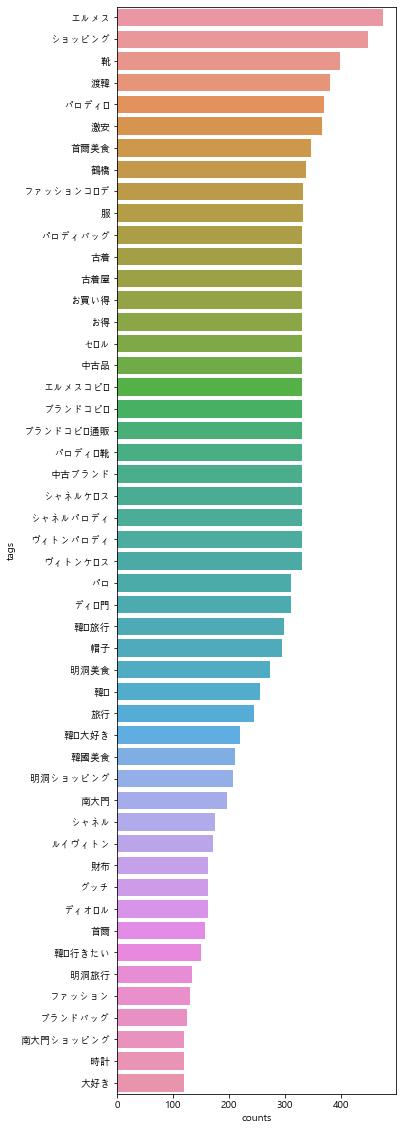

In [187]:
# 예제 5-21 막대 차트 그리기
plt.figure(figsize=(5,20)) 
sns.barplot(x='counts', y='tags', data = tag_counts_df)